In [1]:
%matplotlib inline
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

## １．データ投入

In [2]:
with codecs.open("./ks-projects-201801.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_csv(file);


In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df.shape

(378661, 15)

In [6]:
df.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

 ## ２．ここからEDA


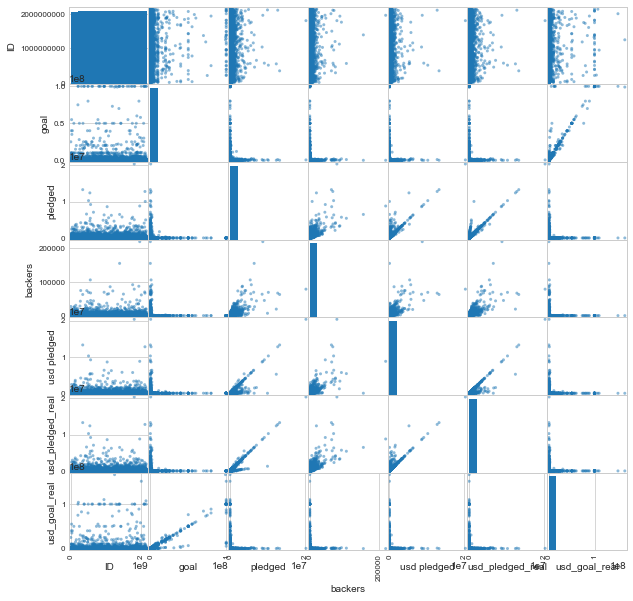

In [7]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df, figsize=(10,10))
plt.show()

### 2-2. バックした人の数

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


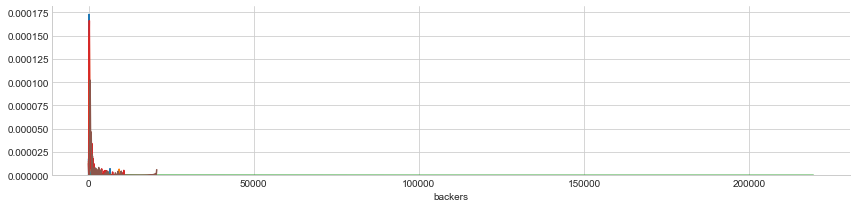

In [8]:
fig = sns.FacetGrid(data=df, hue='state', aspect=4)
fig.map(sns.kdeplot, 'backers', shade=True)

### 2-3. 

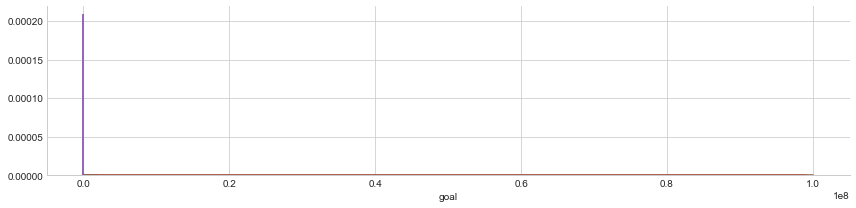

In [9]:
fig = sns.FacetGrid(data=df, hue='state', aspect=4)
fig.map(sns.kdeplot, 'goal', shade=True)

## 3. 前処理

### 3-1. データ整理

In [10]:
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')].copy()
print(df.shape)

df = df.drop('ID', axis=1)
df = df.drop('name', axis=1)
df = df.drop('usd pledged', axis=1)  
df = df.drop('usd_pledged_real', axis=1)
df = df.drop('backers', axis=1)

(331675, 15)


In [11]:
df.head(5)

,category,main_category,currency,deadline,goal,launched,pledged,state,country,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,US,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,US,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,US,5000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,US,50000.00


In [12]:
# スタートからエンド（デッドライン）までの日数を絡むとして持たせて、スタート、エンドは削除
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

df['duration_days'] = df['deadline'].subtract(df['launched']).astype('timedelta64[D]')

df.drop(['launched','deadline','pledged'],axis=1,inplace=True)

In [13]:
df.head(5)

,category,main_category,currency,goal,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,failed,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,failed,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,45000.0,failed,US,45000.00,44.0
3,Music,Music,USD,5000.0,failed,US,5000.00,29.0
5,Restaurants,Food,USD,50000.0,successful,US,50000.00,34.0


In [14]:
# 成功、失敗を２値化する

df['state'] = df['state'].map({
        'failed': 0,
        'successful': 1         
})

In [15]:
# ダミー変数化する

dummy_df = pd.get_dummies(df, 
                          columns=['category','main_category','currency','country'],
                          drop_first=True)

In [16]:
dummy_df.head()

,goal,state,usd_goal_real,duration_days,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0,1533.95,58.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,0,30000.00,59.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,0,45000.00,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,0,5000.00,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,1,50000.00,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 4.予測

In [17]:
y = dummy_df['state']

In [18]:
X = dummy_df.drop('state',axis=1)

In [19]:
# ロジスティック回帰

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

NameError: name 'logreg' is not defined

In [20]:
# 重みを取得して重要度順に
coeff_df = pd.DataFrame(X.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(clf.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
187,country_AU,4790.657712
170,main_category_Photography,1845.029685
138,category_Taxidermy,1489.251330
166,main_category_Food,1411.449326
115,category_Public Art,1122.408900
164,main_category_Fashion,1120.734637
168,main_category_Journalism,977.893127
174,currency_CAD,817.761150
131,category_Small Batch,671.637814
41,category_Drama,642.298197


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

In [22]:
# ラベルを予測
y_pred = clf.predict(X)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 57.359%
適合率（Precision） = 70.496%
再現率（Recall） = 48.962%
F1値（F1-score） = 57.788%


In [23]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -14.728
正答率 = 57.359%


In [24]:
# 予測値と正解のクロス集計（混同行列）
conf_mat = confusion_matrix(y, y_pred)
conf_mat = pd.DataFrame(conf_mat, 
                        index=['正解 = Failed', '正解 = Success'], 
                        columns=['予測 = Failed', '予測 = Success'])
conf_mat

,予測 = Failed,予測 = Success
正解 = Failed,96807,100912
正解 = Success,40516,93440


## トレーニング、テストに分けて実行

In [26]:
from sklearn.model_selection import train_test_split
## わける
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, 
    test_size = 0.1,
    random_state=42
)
 
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)     
    

(298507, 210) (298507,)
(33168, 210) (33168,)


### ロジスティック回帰

In [27]:
clf2 = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf2.fit(X_train, Y_train)

acc_log = round(clf2.score(X_test, Y_test) * 100, 2)
acc_log

58.9

### LGBM

In [38]:
import lightgbm as lgb

params = {
        'task': 'lgb_train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'num_class': 3,
        'learning_rate': 0.1,
        'num_leaves': 23,
        'min_data_in_leaf': 1,
        'num_iteration': 100,
        'verbose': 0
}


lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

clf_lgbm = lgb.train(params,
            lgb_train,
            num_boost_round=50,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)

clf_lgbm.fit(X_train, 
        Y_train,
        params,
        eval_set= [(X_train, Y_train), (X_test, Y_test)], 
        eval_metric='auc', 
        verbose=0, 
        early_stopping_rounds=30
       )

acc_clf_lgbm = round(clf_lgbm.score(X_test, Y_test) * 100, 2)
acc_clf_lgbm

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LightGBMError: Unknown task type lgb_train